## Observations and Insights 

OBSERVATIONS:

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
data_mouse = pd.read_csv(mouse_metadata_path)
results_data = pd.read_csv(study_results_path)

# Combine the data into a single dataset


In [60]:
data_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [61]:
results_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [62]:
data_combined = pd.merge(results_data, data_mouse, how="left", on="Mouse ID")
data_combined.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [63]:
# Checking the number of mice in the DataFrame.
len(data_combined)

1893

In [64]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
data_combined[data_combined.duplicated(["Mouse ID", "Timepoint"])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [65]:
# Optional: Get all the data for the duplicate mouse ID. 
drop_mouse = data_combined.loc[data_combined["Mouse ID"]!="g989"]
drop_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [66]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

In [67]:
# Checking the number of mice in the clean DataFrame.
drop_mouse["Mouse ID"].nunique()

248

## Summary Statistics

In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_drug = drop_mouse.groupby(["Drug Regimen"])["Tumor Volume (mm3)"]

tumor_drug_summary = pd.DataFrame({"Mean": tumor_drug.mean(), 
                      "Median": tumor_drug.median(), 
                      "Variance": tumor_drug.var(), 
                      "Std Dev": tumor_drug.std(),
                      "SEM": tumor_drug.sem()})
tumor_drug_summary
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [69]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
# row = mice and timepoint combination
# df = 
# every row is a drug
drug_drop_data = drop_mouse["Drug Regimen"].value_counts()
drug_drop_data2 = drug_drop_data.reset_index()
drug_drop_data2

,index,Drug Regimen
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Stelasyn,181
6,Placebo,181
7,Ceftamin,178
8,Infubinol,178
9,Propriva,148


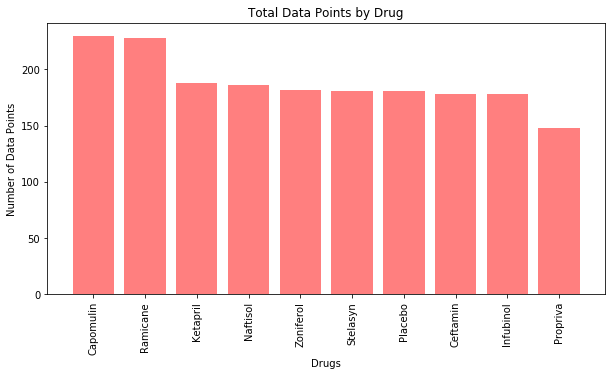

In [70]:
x_axis = np.arange(len(drug_drop_data2))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10,5))
plt.bar(x_axis, drug_drop_data2["Drug Regimen"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, drug_drop_data2["index"], rotation="vertical")
plt.xlabel('Drugs')
plt.ylabel('Number of Data Points')
plt.title('Total Data Points by Drug')
plt.show()

Text(0.5, 1.0, 'Total Data Points by Drug')

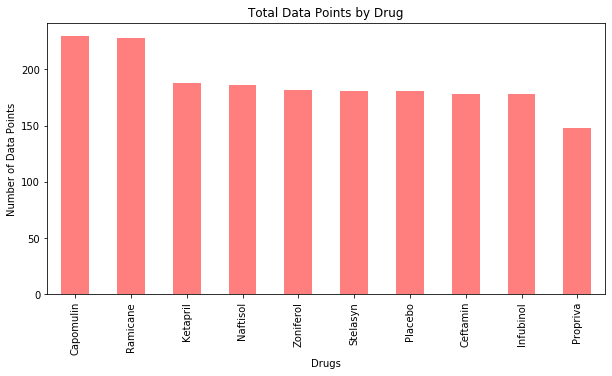

In [71]:
#1 column is y axis, index is x axis 
plt.figure(figsize=(10,5))
drug_drop_data.plot(kind = "bar", color='r', alpha=0.5, align="center")
plt.xlabel('Drugs')
plt.ylabel('Number of Data Points')
plt.title('Total Data Points by Drug')

In [72]:
drug_drop_data

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

## Pie Plots

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#plt
gender_count = drop_mouse.groupby('Sex').count()["Mouse ID"]
gender_count

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

In [80]:
gender_count.values

array([922, 958], dtype=int64)

In [81]:
gender_count.index.values

array(['Female', 'Male'], dtype=object)

Text(0.5, 1.0, 'Percentage of Males vs Females Tested')

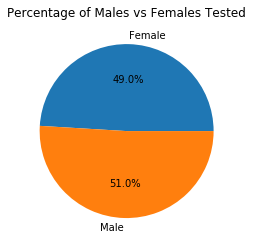

In [82]:
#MatPlotLib (PyPlot)
plt.pie(gender_count.values, labels = gender_count.index.values, autopct = '%1.1f%%')
plt.title('Percentage of Males vs Females Tested')

Text(0.5, 1.0, 'Percentage of Males vs Females Tested')

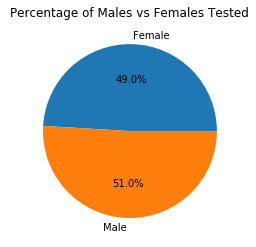

In [83]:
#Pandas
gender_count.plot.pie(labels = gender_count.index.values, autopct = '%1.1f%%')
plt.ylabel(" ")
plt.title('Percentage of Males vs Females Tested')

## Quartiles, Outliers and Boxplots

In [84]:
drop_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [85]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#groupby mouse ID
mouse_time = pd.DataFrame (drop_mouse.groupby(["Mouse ID"]).max()["Timepoint"])
mouse_time
#merge Left outer join:To include all the rows of your data frame mouse_time and only those from drop_mouse that match, specify how=‘left’.
last_time = pd.merge(mouse_time, drop_mouse, how="left", on=["Mouse ID", "Timepoint"])
last_time
#tumor volume in relation to latest timepoint 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [86]:
#Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin = last_time[last_time['Drug Regimen'] == "Capomulin"]["Tumor Volume (mm3)"]
Ramicane = last_time[last_time['Drug Regimen'] == "Ramicane"]["Tumor Volume (mm3)"]
Infubinol = last_time[last_time['Drug Regimen'] == "Infubinol"]["Tumor Volume (mm3)"]
Ceftamin = last_time[last_time['Drug Regimen'] == "Ceftamin"]["Tumor Volume (mm3)"]

Capomulin


19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [87]:
quartiles = Capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [88]:
#do other 3 drugs

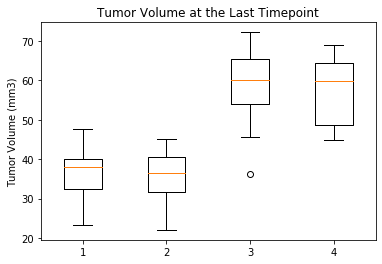

In [89]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#4drugs

plt.boxplot([Capomulin, Ramicane, Infubinol, Ceftamin])
plt.title('Tumor Volume at the Last Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

In [90]:
drop_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [91]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Cap_mouse = drop_mouse[drop_mouse['Drug Regimen'] == "Capomulin"][["Tumor Volume (mm3)", "Timepoint", "Mouse ID"]]
j119 = Cap_mouse[Cap_mouse['Mouse ID'] == "j119"]
j119
#continue to use j119 for lineplot
#get the data you need using pandas
#after that
#create plot using MPL

,Tumor Volume (mm3),Timepoint,Mouse ID
235,45.000000,0,j119
354,45.838998,5,j119
570,46.425366,10,j119
818,47.322984,15,j119
1009,48.158209,20,j119
1136,42.417166,25,j119
1441,43.013681,30,j119
1599,43.765705,35,j119
1673,44.585090,40,j119
1859,38.125164,45,j119


In [92]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#Weight (g)
#mean.Tumor Volume (mm3)
Cap_mouse2 = drop_mouse[drop_mouse['Drug Regimen'] == "Capomulin"][["Tumor Volume (mm3)", "Weight (g)", "Mouse ID"]]
Cap_mouse2
weight_tumor = Cap_mouse2.groupby(["Mouse ID"]).mean()
weight_tumor

,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22
b742,40.083699,21
f966,36.505973,17
g288,41.990097,19
g316,44.613344,22
i557,44.805810,24
i738,39.141053,20
j119,44.465236,23
j246,43.216925,21


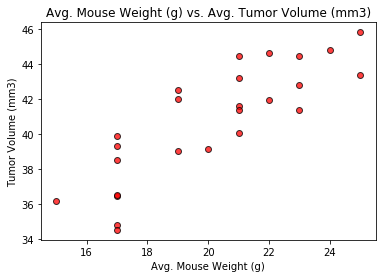

In [93]:
plt.scatter(weight_tumor["Weight (g)"], weight_tumor["Tumor Volume (mm3)"], marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)
plt.title('Avg. Mouse Weight (g) vs. Avg. Tumor Volume (mm3)')
plt.xlabel('Avg. Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708717


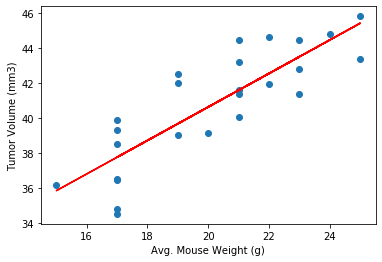

y = 0.95x + 21.55


In [97]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = weight_tumor["Weight (g)"]
y_values = weight_tumor["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel('Avg. Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()
print(line_eq)